<a href="https://colab.research.google.com/github/BharathRagavan21/Temperature-analysis-and-prediction-using-DHT-11/blob/main/Temperature_prediction_using_DHT_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import SARIMAX
from sklearn.metrics import mean_squared_error
from datetime import timedelta

In [ ]:
# Load sensor data and OpenWeather data into DataFrames
df_alerts = pd.read_csv("alerts.csv")
df_alerts.head()

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-09-11 11:39:22 UTC,83,24.1,400.0,mist,303.69,1,99690.0,51.0,59.0
1,2023-09-11 11:43:55 UTC,84,396.0,1.0,mist,303.69,1,49.0,25.4,99584.0
2,2023-09-11 12:01:31 UTC,85,387.0,1.0,mist,303.69,1,50.0,26.4,97986.0
3,2023-09-11 12:01:54 UTC,86,26.2,387.0,mist,303.69,1,98048.0,51.0,45.0
4,2023-09-11 12:02:13 UTC,87,26.1,387.0,mist,303.69,1,98118.0,50.0,56.0


In [ ]:
# Example data cleaning: Convert temperature from Kelvin to Celsius
print(df_alerts.columns)
df_alerts['field4'] = df_alerts['field4'] - 273.15
df_alerts.rename(columns={"field4": "OpenWeather_Temperature"}, inplace=True)
df_alerts['field2'] = df_alerts['field2'] - 273.15
df_alerts.rename(columns={"field2": "Sensor_Temperature"}, inplace=True)

Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'field8'],
      dtype='object')


In [ ]:
# Choose a suitable time series forecasting model (SARIMA in this example)
order = (1, 1, 1)  # Replace with appropriate SARIMA order
seasonal_order = (1, 1, 1, 24)  # Replace with appropriate seasonal order
model = SARIMAX(train['Temperature'], order=order, seasonal_order=seasonal_order)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# Assuming 'created_at' is the timestamp in df_auto, and it's in the same format as in df_alerts
df_alerts['created_at'] = pd.to_datetime(df_alerts['created_at'])
# Merge the DataFrames based on the common timestamp ('created_at')
merged_df = pd.merge(df_alerts, df_alerts, left_on="created_at", right_on="created_at", how="inner")

In [ ]:
# Make predictions for the next 1 hour
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Print the forecasted temperature for the next 1 hour
print("Forecasted Temperature for the Next Hour:")
print(forecast_mean)

Forecasted Temperature for the Next Hour:
80   -242.61
81   -242.61
82   -242.61
83   -242.61
84   -242.61
85   -242.61
86   -242.61
87   -242.61
88   -242.61
89   -242.61
90   -242.61
91   -242.61
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Suggest AC temperature based on forecast (customize as needed)
if forecast_mean.values[0] > 25:
    ac_temperature = 20  # Suggest a lower AC temperature to cool the room
else:
    ac_temperature = 25  # Maintain the current temperature

print(f"Suggested AC Temperature: {ac_temperature} °C")

Suggested AC Temperature: 25 °C


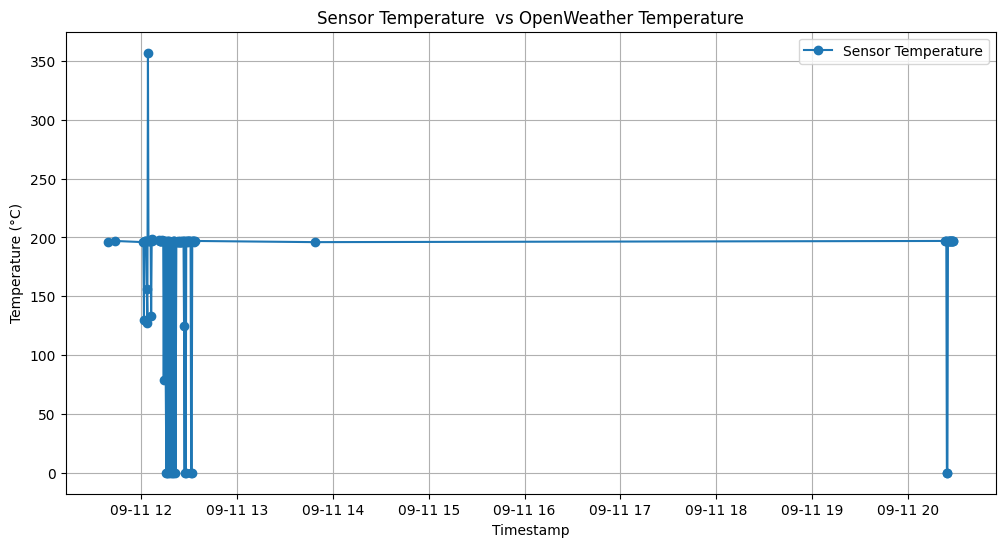

In [ ]:
# Data Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_alerts['created_at'], df_auto['field4'], label='Sensor Temperature', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Sensor Temperature  vs OpenWeather Temperature')
plt.legend()
plt.grid(True)
plt.show()